#  Lab2: Splines
 
 
### First study the examples in different libraries: Scipy, Statsmodels, sk-learn, pyGAM, csaps, then try to use different different methods do the following questions: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

/var/folders/29/wq14mrc56b72ty43ycw_32yr0000gn/T/ipykernel_72726/2971232441.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Regression Splines

The dataset fev.csv contains the measurements of forced expiratory volume (FEV) tests, evaluating the pulmonary capacity in 654 children and young adults.

1. ``Plot`` the association between fev and height and fit a ``linear model`` for fev using height as a predictor

2. Fit a model for fev with a ``natural cubin spline`` for the predictor height, with  df 5 and 10.

3. Fit a model for fev with a ``smoothing cubic spline`` for the predictor height. (Use cross valication to find smoothing parameter lambda) 

4. Fit a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10.

5. Plot the ``fitted curves`` for above models. 

6. compare the ``cross-validated MSE`` of the above models.


In [2]:
df1 = pd.read_csv('fev.csv')
df1.head(3)

,id,age,fev,height,sex,smoke
0,301,9,1.708,57.0,female,non-current smoker
1,451,8,1.724,67.5,female,non-current smoker
2,501,7,1.720,54.5,female,non-current smoker


In [3]:
len(df1)

654

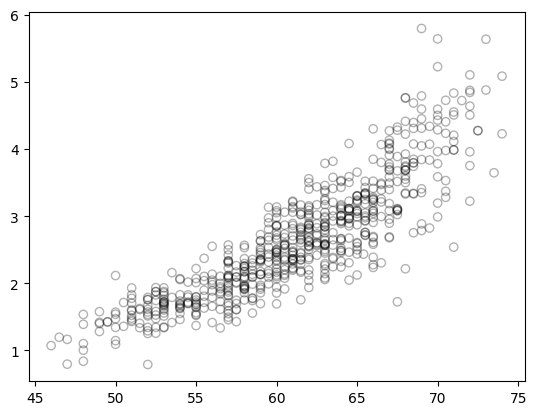

In [4]:
# Visualize the relationship b/w age and wage
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.show() 

In [5]:
# Generating weights for polynomial function with degree =5
weights = np.polyfit(df1.height, df1.fev, 5)
print(weights) 

[-3.62882037e-07  1.04598980e-04 -1.19414498e-02  6.77612870e-01
 -1.90808036e+01  2.13747676e+02]


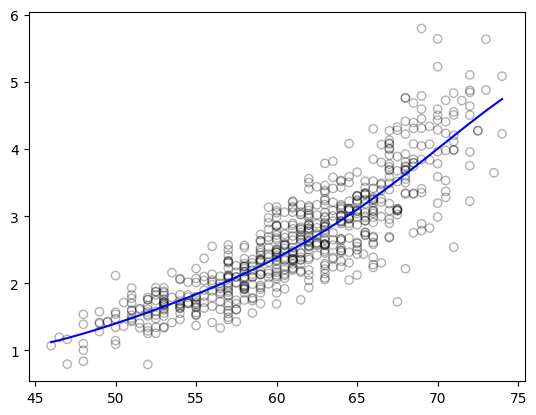

In [6]:
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(df1.height)
# We will plot the graph for 70 observations only
xp = np.linspace(df1.height.min(),df1.height.max(),70)
pred_plot = model(xp)
plt.scatter(df1.height,df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot, color='blue')
plt.show()

# Spaty and dmatrix

## 1. The association of between the fev and height, and the linear model.

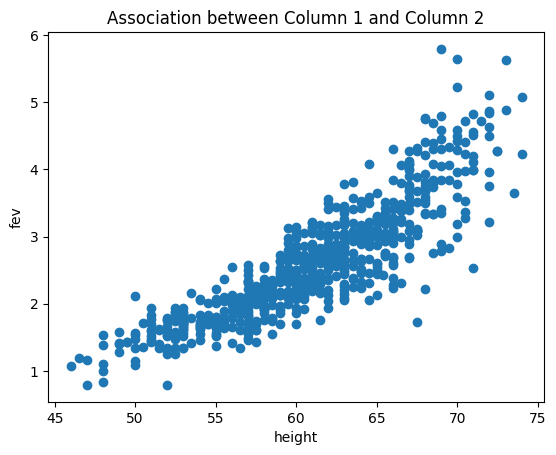

In [7]:
# For a simple scatter plot to show the association:
plt.scatter(df1['height'], df1['fev'])
plt.xlabel('height')
plt.ylabel('fev')
plt.title('Association between Column 1 and Column 2')
plt.show()

In [8]:
correlation = df1['height'].corr(df1['fev'], method='pearson')
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.8681350090645041


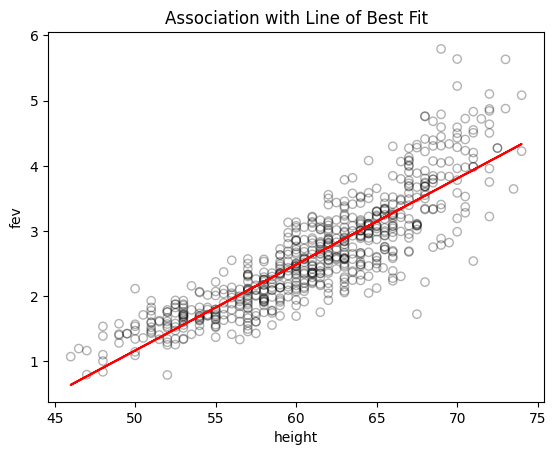

In [9]:
# Calculate coefficients for the line of best fit
a, b = np.polyfit(df1['height'], df1['fev'], 1)

# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(df1['height'], a * df1['height'] + b, color='red')  # Line of best fit
plt.xlabel('height')
plt.ylabel('fev')
plt.title('Association with Line of Best Fit')
plt.show()

In [10]:
print("The funciton is y = ", a, 'x', b)

The funciton is y =  0.13197557097843463 x -5.432678799279138


In [11]:
mse = mean_squared_error(a * df1.height + b, df1.fev)
print("The mean square error is", mse)

The mean square error is 0.18491434389567543


## 2.Fit the model with natural cubic spline with df = 5 and 10

In [12]:
from patsy import dmatrix

In [13]:
# Specifying 5 degrees of freedom
transformed_x1 = dmatrix("cr(df1.height, df=5)", {"df1.height": df1.height}, return_type='dataframe')
fit1 = sm.GLM(df1.fev, transformed_x1).fit()
fit1.params

Intercept                  2.281729
cr(df1.height, df=5)[0]   -1.091239
cr(df1.height, df=5)[1]   -0.577297
cr(df1.height, df=5)[2]    0.213446
cr(df1.height, df=5)[3]    1.156871
cr(df1.height, df=5)[4]    2.579948
dtype: float64

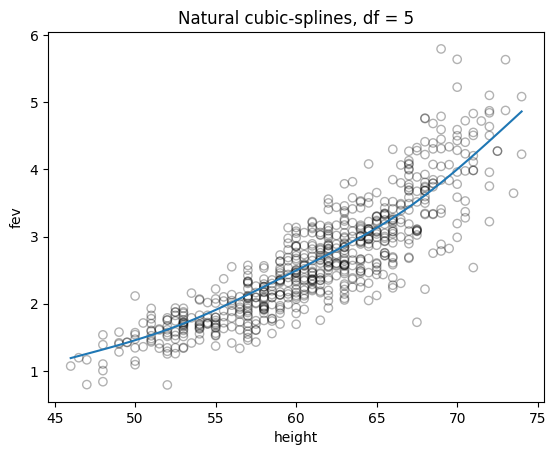

In [14]:
# Plot the natural spline result
height_grid = np.linspace(df1['height'].min(), df1['height'].max(), 100)
transformed_height_grid = dmatrix("cr(height_grid, df=5)",
                        {"height_grid": height_grid}, return_type='dataframe')
predicted_fev = fit1.predict(transformed_height_grid)
plt.plot(height_grid, predicted_fev)


# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('height')
plt.ylabel('fev')
plt.title('Natural cubic-splines, df = 5')
plt.show()

In [15]:
mse = mean_squared_error(fit1.predict(transformed_x1), df1.fev)
print("MSE of Natural cubic splines df = 5 is ", mse)

MSE of Natural cubic splines df = 5 is  0.16912365710292565


In [16]:
# Specifying 5 degrees of freedom
transformed_x2 = dmatrix("cr(df1.height, df=10)", {"df1.height": df1.height}, return_type='dataframe')
fit2 = sm.GLM(df1.fev, transformed_x2).fit()
fit2.params

Intercept                   2.416077
cr(df1.height, df=10)[0]   -1.441547
cr(df1.height, df=10)[1]   -0.953059
cr(df1.height, df=10)[2]   -0.746200
cr(df1.height, df=10)[3]   -0.541234
cr(df1.height, df=10)[4]   -0.117930
cr(df1.height, df=10)[5]    0.342679
cr(df1.height, df=10)[6]    0.593499
cr(df1.height, df=10)[7]    1.259484
cr(df1.height, df=10)[8]    1.776412
cr(df1.height, df=10)[9]    2.243974
dtype: float64

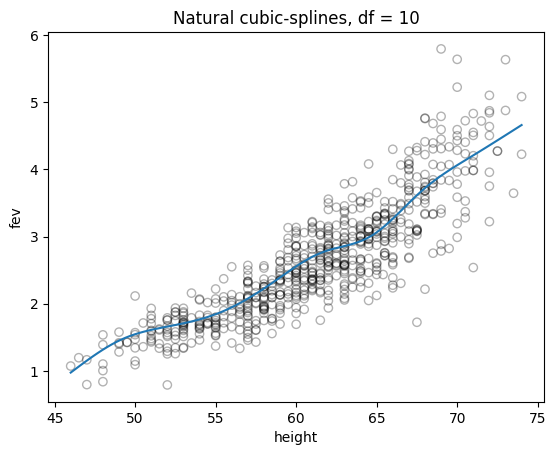

In [17]:
# Plot the natural spline result
height_grid = np.linspace(df1['height'].min(), df1['height'].max(), 100)
transformed_height_grid = dmatrix("cr(height_grid, df=10)",
                        {"height_grid": height_grid}, return_type='dataframe')
predicted_fev = fit2.predict(transformed_height_grid)
plt.plot(height_grid, predicted_fev)


# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('height')
plt.ylabel('fev')
plt.title('Natural cubic-splines, df = 10')
plt.show()

In [18]:
mse = mean_squared_error(fit2.predict(transformed_x2), df1.fev)
print("MSE of Natural cubic splines df = 10 is ", mse)

MSE of Natural cubic splines df = 10 is  0.16460475966341578


## 3. Fit the model with smoothing cubic splines(use cross validation to determined lambda)

In [19]:
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
# train test split
X = df1['height']
y = df1['fev']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sort the training set
train_set = pd.concat([X_train, y_train], axis=1)
train_set_sorted = train_set.sort_values(by='height')
X_train_sorted = train_set_sorted[['height']]
y_train_sorted = train_set_sorted[['fev']]

# sort the test set
test_set = pd.concat([X_test, y_test], axis=1)
test_set_sorted = test_set.sort_values(by='height')
X_test_sorted = test_set_sorted[['height']]
y_test_sorted = test_set_sorted[['fev']]

In [20]:
X_train_np = X_train_sorted.to_numpy().flatten()
y_train_np = y_train_sorted.to_numpy().flatten()

X_test_np = X_test_sorted.to_numpy().flatten()
y_test_np = y_test_sorted.to_numpy().flatten()

In [21]:
y_test_np

array([1.072, 1.102, 1.282, 1.577, 1.427, 1.343, 1.452, 1.603, 1.93 ,
       1.572, 1.253, 1.675, 1.602, 1.858, 1.726, 1.759, 1.695, 2.056,
       1.649, 1.634, 1.72 , 1.535, 1.64 , 2.102, 1.92 , 1.872, 1.999,
       2.104, 1.947, 2.42 , 2.119, 1.962, 2.004, 1.591, 2.32 , 2.57 ,
       1.429, 2.015, 1.747, 1.953, 1.919, 2.564, 1.556, 1.742, 2.135,
       2.631, 2.42 , 2.352, 2.346, 2.529, 2.182, 2.639, 2.535, 2.901,
       2.164, 1.855, 2.646, 2.123, 2.715, 2.732, 2.681, 2.56 , 3.058,
       3.029, 2.974, 3.5  , 3.007, 2.822, 2.198, 2.866, 3.436, 3.016,
       3.056, 2.503, 2.975, 2.85 , 2.211, 2.993, 3.258, 2.578, 2.568,
       3.206, 2.923, 3.147, 2.934, 3.004, 2.328, 2.241, 2.659, 2.048,
       3.11 , 2.988, 3.038, 3.654, 3.074, 3.   , 3.183, 3.331, 3.32 ,
       3.425, 3.519, 3.203, 3.111, 2.906, 4.299, 3.042, 3.387, 4.086,
       3.906, 4.13 , 3.583, 4.27 , 4.073, 3.104, 4.279, 3.681, 3.727,
       4.683, 3.842, 5.793, 3.406, 3.35 , 4.336, 3.96 , 4.429, 3.78 ,
       4.591, 3.369,

In [22]:
fit3 = UnivariateSpline(X_train_np, y_train_np)
fit3.set_smoothing_factor(100)
mse = mean_squared_error(fit3(X_test), y_test)
print("mse of lambda = 100 is ", mse)
fit3 = UnivariateSpline(X_train_np, y_train_np)
mse = mean_squared_error(fit3(X_test), y_test)
print("mse of lambda = 5000 is ", mse)

mse of lambda = 100 is  0.17036988407404807
mse of lambda = 5000 is  0.17036988407404807


Accually the $\lambda$ doesn't matter in this case

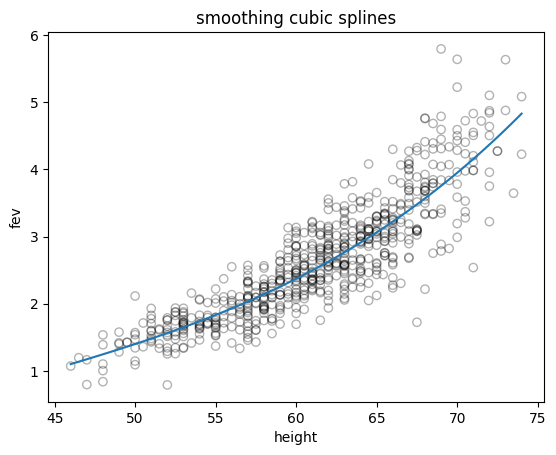

In [23]:
# Plot the b-spline result
height_grid = np.linspace(df1['height'].min(), df1['height'].max(), 100)
plt.plot(height_grid, fit3(height_grid))


# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('height')
plt.ylabel('fev')
plt.title('smoothing cubic splines')
plt.show()

## 4. Fit the model with cubic B-spline with df = 5 and 10

In [24]:
# Specifying 6 degrees of freedom 
transformed_x4 = dmatrix("bs(df1.height, df=5, include_intercept=False)",
                        {"df1.height": df1.age}, return_type='dataframe')
fit4 = sm.GLM(df1.fev, transformed_x4).fit()
fit4.params

Intercept                                           1.187163
bs(df1.height, df=5, include_intercept=False)[0]    0.133350
bs(df1.height, df=5, include_intercept=False)[1]    0.762589
bs(df1.height, df=5, include_intercept=False)[2]    1.871618
bs(df1.height, df=5, include_intercept=False)[3]    3.024734
bs(df1.height, df=5, include_intercept=False)[4]    3.521972
dtype: float64

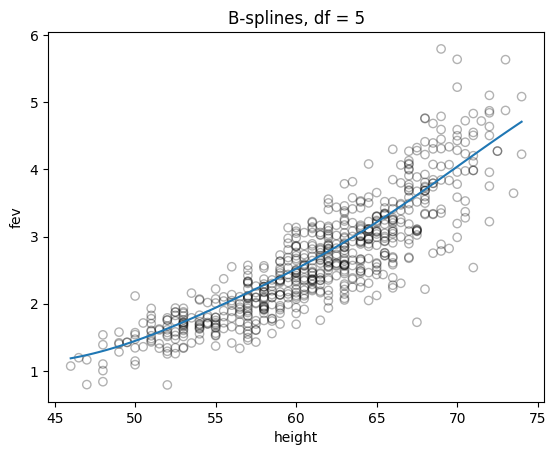

In [25]:
# Plot the b-spline result
height_grid = np.linspace(df1['height'].min(), df1['height'].max(), 100)
transformed_height_grid = dmatrix("bs(height_grid, df=5, include_intercept=False)",
                        {"height_grid": height_grid}, return_type='dataframe')
predicted_fev = fit4.predict(transformed_height_grid)
plt.plot(height_grid, predicted_fev)


# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('height')
plt.ylabel('fev')
plt.title('B-splines, df = 5')
plt.show()

In [26]:
mse = mean_squared_error(fit4.predict(transformed_x4), df1.fev)
print("MSE of B splines df = 5 is ", mse)

MSE of B splines df = 5 is  0.16923728822489412


In [27]:
# Specifying 6 degrees of freedom 
transformed_x5 = dmatrix("bs(df1.height, df=10, include_intercept=False)",
                        {"df1.height": df1.age}, return_type='dataframe')
fit5 = sm.GLM(df1.fev, transformed_x5).fit()
fit5.params

Intercept                                            0.991049
bs(df1.height, df=10, include_intercept=False)[0]    0.360389
bs(df1.height, df=10, include_intercept=False)[1]    0.692394
bs(df1.height, df=10, include_intercept=False)[2]    0.866263
bs(df1.height, df=10, include_intercept=False)[3]    1.410585
bs(df1.height, df=10, include_intercept=False)[4]    1.648635
bs(df1.height, df=10, include_intercept=False)[5]    1.902378
bs(df1.height, df=10, include_intercept=False)[6]    1.901413
bs(df1.height, df=10, include_intercept=False)[7]    3.225669
bs(df1.height, df=10, include_intercept=False)[8]    3.206197
bs(df1.height, df=10, include_intercept=False)[9]    3.695932
dtype: float64

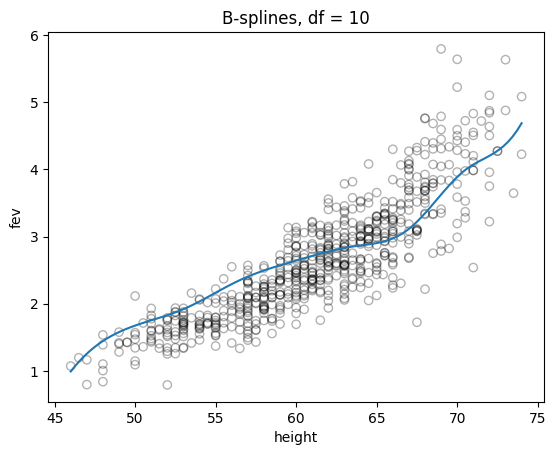

In [28]:
# Plot the b-spline result
height_grid = np.linspace(df1['height'].min(), df1['height'].max(), 100)
transformed_height_grid = dmatrix("bs(height_grid, df=10, include_intercept=False)",
                        {"height_grid": height_grid}, return_type='dataframe')
predicted_fev = fit5.predict(transformed_height_grid)
plt.plot(height_grid, predicted_fev)


# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('height')
plt.ylabel('fev')
plt.title('B-splines, df = 10')
plt.show()

In [29]:
mse = mean_squared_error(fit5.predict(transformed_x5), df1.fev)
print("MSE of B splines df = 10 is ", mse)

MSE of B splines df = 10 is  0.16443531672606293


## 5.Plot all the result

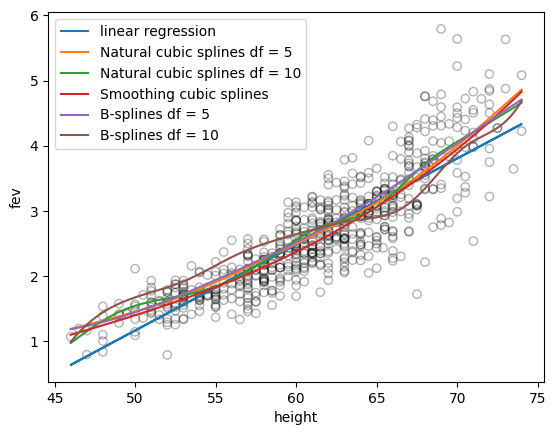

In [30]:
# Plot the b-spline result
height_grid = np.linspace(df1['height'].min(), df1['height'].max(), 100)
pred1 = fit1.predict(dmatrix("cr(height_grid, df=5)",
                        {"height_grid": height_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("cr(height_grid, df=10)",
                        {"height_grid": height_grid}, return_type='dataframe'))
pred4 = fit4.predict(dmatrix("bs(height_grid, df=5, include_intercept=False)",
                        {"height_grid": height_grid}, return_type='dataframe'))

pred5 = fit5.predict(dmatrix("bs(height_grid, df=10, include_intercept=False)",
                        {"height_grid": height_grid}, return_type='dataframe'))

plt.plot(df1['height'], a * df1['height'] + b, label = 'linear regression')
plt.plot(height_grid, pred1,label = 'Natural cubic splines df = 5')
plt.plot(height_grid, pred2,label = 'Natural cubic splines df = 10')
plt.plot(height_grid, fit3(height_grid),label = 'Smoothing cubic splines')
plt.plot(height_grid, pred4, label = 'B-splines df = 5')
plt.plot(height_grid, pred5, label = 'B-splines df = 10')


# Add the line of best fit to the scatter plot
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('height')
plt.ylabel('fev')
plt.legend()
plt.show()

## 6.Compare the MSE results

In [31]:
mse = mean_squared_error(a * df1.height + b, df1.fev)
print("The mean square error of linear regression is", mse)
mse = mean_squared_error(fit1.predict(transformed_x1), df1.fev)
print("MSE of Natural cubic splines df = 5 is ", mse)
mse = mean_squared_error(fit2.predict(transformed_x2), df1.fev)
print("MSE of Natural cubic splines df = 10 is ", mse)
mse = mean_squared_error(fit3(X), y)
print("mse of Smoothing cubic splines is ", mse)
mse = mean_squared_error(fit4.predict(transformed_x4), df1.fev)
print("MSE of B splines df = 5 is ", mse)
mse = mean_squared_error(fit5.predict(transformed_x5), df1.fev)
print("MSE of B splines df = 10 is ", mse)

The mean square error of linear regression is 0.18491434389567543
MSE of Natural cubic splines df = 5 is  0.16912365710292565
MSE of Natural cubic splines df = 10 is  0.16460475966341578
mse of Smoothing cubic splines is  0.17017800114124526
MSE of B splines df = 5 is  0.16923728822489412
MSE of B splines df = 10 is  0.16443531672606293


# 2. Classification 

You can use PyGAM:
https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Classification 

 


## Question:

The dataset Heart.csv contains on coronary heart disease status (variable chd) and several risk factors including the cumulative tobacco consumption tobacco, systolic sbp, and age

1. Fit a GAM logistic model for chd with splines for the predictor tobacco, sbp and age

2. Find the AUC ROC for the model above.  (optional)

3. Compare the AUC ROC of the GAM model with a logistic regression with linear effects for the predictors.(optional)


In [32]:
df2 = pd.read_csv('Heart.csv')
df2.head(3)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0


In [33]:
display(df2.chd.value_counts())

chd
0    302
1    160
Name: count, dtype: int64

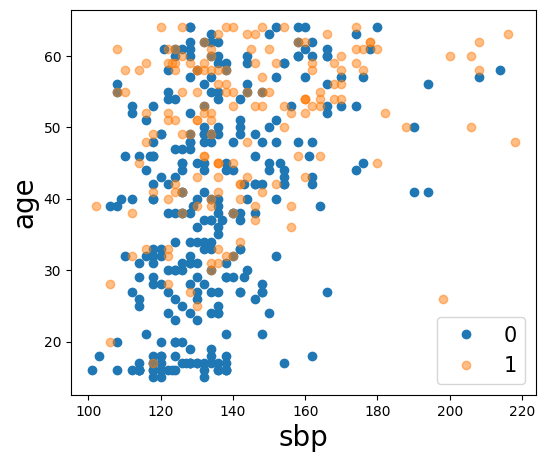

In [34]:
f, ax = plt.subplots(figsize=(6,5))

I_0 = df2["chd"]==0
I_1 = df2["chd"]==1

plt.plot(df2["sbp"][I_0], df2["age"][I_0],'o',label="0")

## We set alpha=.5 to try to avoid masking, but some points still will be burried. 
plt.plot(df2["sbp"][I_1], df2["age"][I_1],'o',label="1",alpha=.5)

plt.xlabel("sbp",fontsize=20)
plt.ylabel("age",fontsize=20)
plt.legend(fontsize=15)

## 1.Fit a GAM logistic model for chd

In [35]:
import pygam
Heart = pd.read_csv('Heart.csv')
Heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [36]:
X = Heart[["tobacco", "sbp", "age"]]
y = Heart["chd"]

In [37]:
heart_gam = pygam.LogisticGAM().fit(X, y)
heart_gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     23.2575
Link Function:                        LogitLink Log Likelihood:                                  -242.7391
Number of Samples:                          462 AIC:                                              531.9933
                                                AICc:                                              534.799
                                                UBRE:                                               3.1918
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1856
Feature Function                  Lam

/var/folders/29/wq14mrc56b72ty43ycw_32yr0000gn/T/ipykernel_72726/477276571.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  heart_gam.summary()


In [38]:
heart_gam.accuracy(X, y)

0.7380952380952381

## 2. Find the AUC ROC of the model above

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [40]:
y_pred_proba = heart_gam.predict_proba(X)
auc = roc_auc_score(y, y_pred_proba)
print(f'The AUC-ROC score is: {auc}')

The AUC-ROC score is: 0.7737996688741722


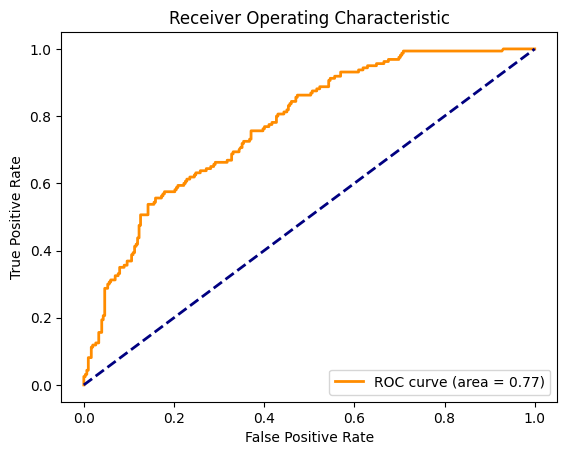

In [41]:
fpr, tpr, _ = roc_curve(y, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 3.Compare it with logistic regression with linear effect of the predictors

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
auc = roc_auc_score(y, y_pred)
print(f'The AUC-ROC score of logistic regression is: {auc}')

The AUC-ROC score of logistic regression is: 0.642591059602649


In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f'The accuracy score of logistic regression is: {accuracy}')

The accuracy score of logistic regression is: 0.7056277056277056


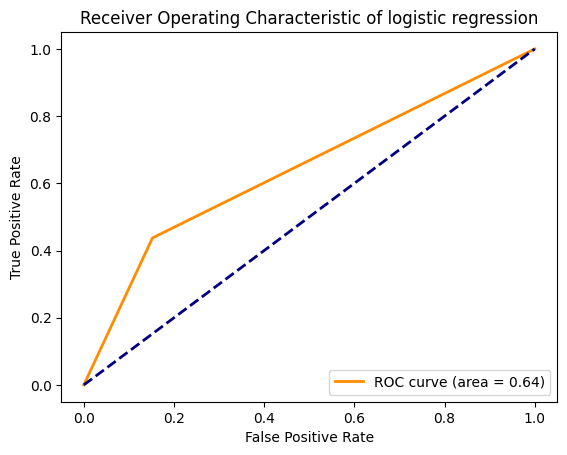

In [45]:
fpr, tpr, _ = roc_curve(y, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of logistic regression')
plt.legend(loc='lower right')
plt.show()

The score of GAM logistic model is performing better than the normal logistic model as the area is larger.